## **Part: Preprocessing**

In [174]:
from typing import Dict, List, Union
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns

In [175]:
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20

In [185]:
data = pd.read_csv('/content/drive/MyDrive/quamet/Sales Forecasting/2016_sales.csv', parse_dates = ["date"])

In [ ]:
#output_path = '/content/drive/My Drive/quamet/ Sales Forcasting/sales_data_preprocessed.csv'
#df_sales_corrected.to_csv(output_path, index=False)

In [177]:
data.sample(5)

,date,store,item,sales
202191,2016-08-24,1,12,63
704841,2013-01-06,7,39,32
314862,2015-03-02,3,18,79
702986,2017-12-08,5,39,27
614141,2014-08-29,7,34,20


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [190]:
total_null_count = data.isnull().sum()
total_null_count

,0
date,0
store,0
item,0
sales,0


In [191]:
def add_outliers_and_nans(data, outlier_percentage=0.1, nan_percentage=0.1):
    # Copy the original data to avoid modifying the input directly
    modified_data = data.copy()

    # Calculate the number of rows to add outliers and NaN values
    num_rows = len(modified_data)
    num_outliers = int(num_rows * outlier_percentage / 100)
    num_nans = int(num_rows * nan_percentage / 100)

    # Add outliers to the 'sales' column
    np.random.seed(42)  # Setting seed for reproducibility
    outlier_indices = np.random.choice(num_rows, num_outliers, replace=False)
    modified_data.loc[
        outlier_indices, "sales"
    ] *= 5  # Increase sales by a factor to create outliers

    # Add NaN values to the 'sales' column
    nan_indices = np.random.choice(num_rows, num_nans, replace=False)
    modified_data.loc[nan_indices, "sales"] = np.nan

    return modified_data

In [192]:
df_sales_modified = add_outliers_and_nans(data, outlier_percentage = 0.5, nan_percentage = 0.5)

In [193]:
total_null_count = df_sales_modified.isnull().sum()
total_null_count

,0
date,0
store,0
item,0
sales,4565


In [194]:
df_sales_modified.to_csv("/content/drive/MyDrive/quamet/Sales Forecasting/df_sales_modified.csv", index=False)

- Vẽ biểu đồ dòng (line plot) cho dữ liệu sales theo thời gian, sử dụng phương pháp forward fill để thay thế giá trị NaN, và vẽ các mũi tên màu đỏ để đánh dấu các giá trị NaN.

<ipython-input-90-23469524963a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['date'] = pd.to_datetime(df_sample['date'])


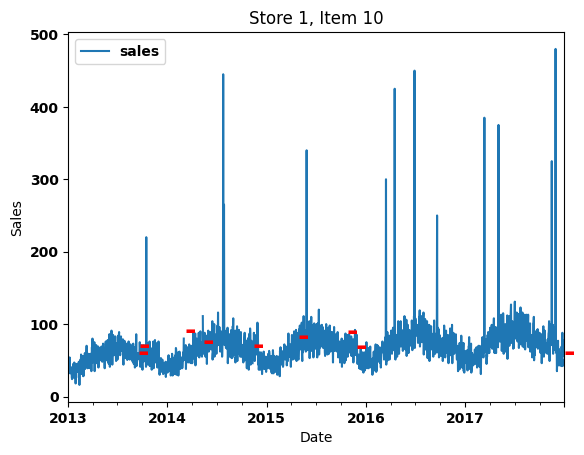

In [ ]:
# Set global font weight to bold
rcParams['font.weight'] = 'bold'

store_id = 1
item_id = 10

# Filter the DataFrame
df_sample = df.query("(store==@store_id) & (item==@item_id)")

# Ensure 'date' column is in datetime format
df_sample['date'] = pd.to_datetime(df_sample['date'])

# Plot sales data
fig, ax = plt.subplots()
df_sample[["date", "sales"]].plot(x="date", y="sales", ax=ax, legend=False)

# Replace NaN values with the mean of surrounding two points
nan_indices = df_sample[df_sample["sales"].isna()].index
if len(nan_indices) > 1:
    df_sample = df_sample.assign(sales=lambda df: df["sales"].ffill())  # Use forward fill

    # Draw arrows for NaN values
    nan_dates = df_sample.loc[nan_indices, "date"]
    nan_sales = df_sample.loc[nan_indices, "sales"]
    for date, sales in zip(nan_dates, nan_sales):
        ax.annotate(
            "-",
            xy=(date, sales),
            color="red",  # Set text color to red
            size=20,
        )

# Set plot labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.set_title(f"Store {store_id}, Item {item_id}")
ax.legend()

# Show plot
plt.show()


<ipython-input-77-ce8270a9a414>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['date'] = pd.to_datetime(df_sample['date'])


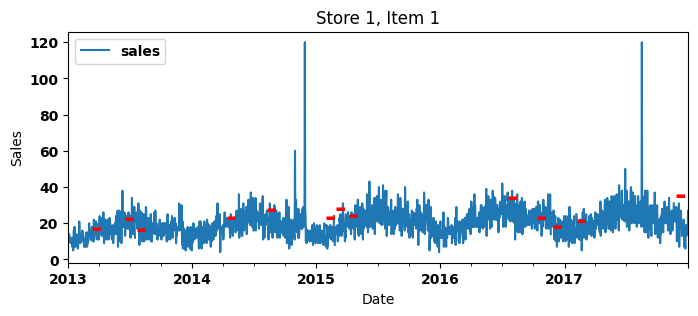

In [ ]:
# Set global font weight to bold
rcParams['font.weight'] = 'bold'

store_id = 1
item_id = 1

# Filter the DataFrame
df_sample = df.query("(store==@store_id) & (item==@item_id)")

# Ensure 'date' column is in datetime format
df_sample['date'] = pd.to_datetime(df_sample['date'])

# Plot sales data
fig, ax = plt.subplots(figsize=(8, 3))
df_sample[["date", "sales"]].plot(x="date", y="sales", ax=ax, legend=False)

# Replace NaN values with the mean of surrounding two points
nan_indices = df_sample[df_sample["sales"].isna()].index
if len(nan_indices) > 1:
    df_sample = df_sample.assign(sales=lambda df: df["sales"].ffill())  # Use forward fill

    # Draw arrows for NaN values
    nan_dates = df_sample.loc[nan_indices, "date"]
    nan_sales = df_sample.loc[nan_indices, "sales"]
    for date, sales in zip(nan_dates, nan_sales):
        ax.annotate(
            "-",
            xy=(date, sales),
            color="red",  # Set text color to red
            size=20,
        )

# Set plot labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.set_title(f"Store {store_id}, Item {item_id}")
ax.legend()

# Show plot
plt.show()

<ipython-input-78-4c255ca10172>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_1['date'] = pd.to_datetime(df_sample_1['date'])
<ipython-input-78-4c255ca10172>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_10['date'] = pd.to_datetime(df_sample_10['date'])


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

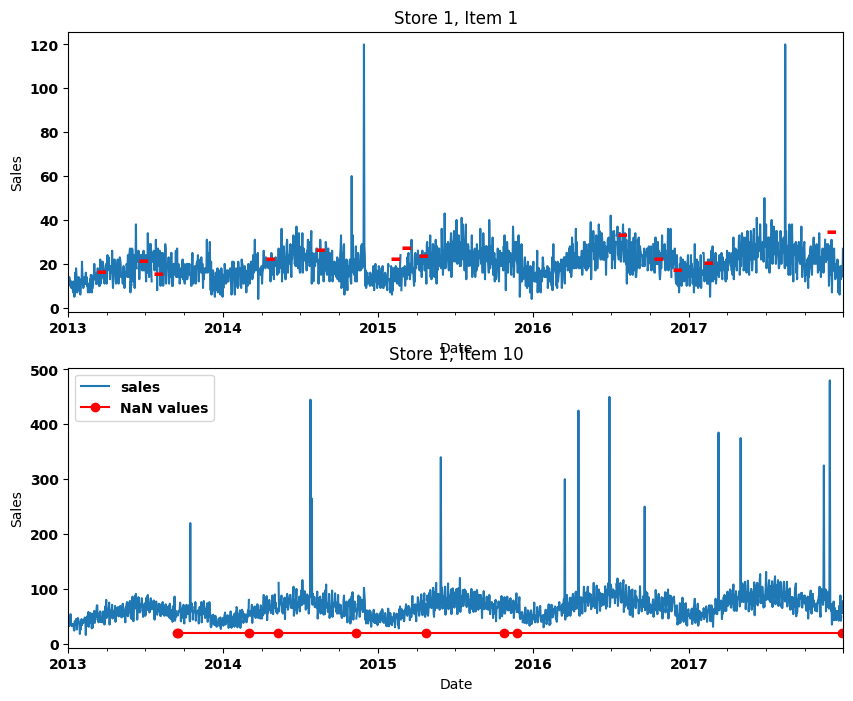

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Đặt trọng lượng font toàn cục là in đậm
rcParams['font.weight'] = 'bold'

# Đặt các tham số store_id và item_id
store_id = 1
item_id_1 = 1
item_id_10 = 10

# Lọc DataFrame cho item_id_1
df_sample_1 = df.query("(store==@store_id) & (item==@item_id_1)")
df_sample_1['date'] = pd.to_datetime(df_sample_1['date'])

# Lọc DataFrame cho item_id_10
df_sample_10 = df.query("(store==@store_id) & (item==@item_id_10)")
df_sample_10['date'] = pd.to_datetime(df_sample_10['date'])

# Tạo figure với hai subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Biểu đồ 1: sales cho item_id_1
df_sample_1[["date", "sales"]].plot(x="date", y="sales", ax=ax1, legend=False)
nan_indices_1 = df_sample_1[df_sample_1["sales"].isna()].index
if len(nan_indices_1) > 1:
    df_sample_1 = df_sample_1.assign(sales=lambda df: df["sales"].ffill())  # Dùng forward fill
    nan_dates_1 = df_sample_1.loc[nan_indices_1, "date"]
    nan_sales_1 = df_sample_1.loc[nan_indices_1, "sales"]
    for date, sales in zip(nan_dates_1, nan_sales_1):
        ax1.annotate(
            "-",
            xy=(date, sales),
            color="red",  # Đặt màu chữ là đỏ
            size=20,
        )
ax1.set_xlabel("Date")
ax1.set_ylabel("Sales")
ax1.set_title(f"Store {store_id}, Item {item_id_1}")

# Biểu đồ 2: sales cho item_id_10
df_sample_10[["date", "sales"]].plot(x="date", y="sales", ax=ax2, legend=False)
nan_indices_10 = df_sample_10[df_sample_10["sales"].isna()].index
if len(nan_indices_10) > 1:
    nan_dates_10 = df_sample_10.loc[nan_indices_10, "date"]
    df_sample_10.loc[nan_indices_10, "sales"] = 20
    nan_sales_10 = df_sample_10.loc[nan_indices_10, "sales"]
    ax2.plot(
        nan_dates_10, nan_sales_10, color="red", marker="o", linestyle="-", label="NaN values"
    )
ax2.set_xlabel("Date")
ax2.set_ylabel("Sales")
ax2.set_title(f"Store {store_id}, Item {item_id_10}")
ax2.legend()

# Hiển thị cả hai subplot
plt.tight_layout

## **Fill Nan Values and Correct Outliers**

In [ ]:
def fill_nan_values(data):
    # Fill NaN values in the 'sales' column with the mean of non-NaN values
    data_filled = data.copy()
    data_filled['sales'] = data_filled['sales'].fillna(data_filled['sales'].mean())
    return data_filled

def correct_outliers(data, factor=5):
    # Identify and correct outliers in the 'sales' column by reducing them to the mean
    data_corrected = data.copy()

    # Identify outliers using z-score
    z_scores = (data_corrected['sales'] - data_corrected['sales'].mean()) / data_corrected['sales'].std()
    outlier_indices = np.abs(z_scores) > 3  # Adjust the threshold as needed

    # Correct outliers by reducing them to the mean
    data_corrected.loc[outlier_indices, 'sales'] = data_corrected['sales'].mean()

    return data_corrected

In [ ]:
def fill_nan_values(data):
    data_filled = data.copy()
    data_filled['sales'] = data_filled['sales'].f

### **Preprocessing**

In [195]:
from typing import Dict, List, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = 20
pd.options.display.max_rows = 20

In [198]:
df_sales = pd.read_csv('/content/drive/MyDrive/quamet/Sales Forecasting/df_sales_modified.csv', parse_dates=["date"])

In [199]:
# unique stores and items
lst_stores = df_sales["store"].unique().tolist()
lst_items = df_sales["item"].unique().tolist()
target = lst_stores
print(f"Stores: {target}")
print(f"Num stores: {len(target)}")

Stores: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Num stores: 10


In [201]:
gp_keys = ["store"]
df_basic_stas = df_sales.groupby(gp_keys).agg(
    mean_sales=("sales", "mean"),
    max_sales=("sales", "max"),
    min_sales=("sales", "min"),
)
df_basic_stas.iloc[:].style.background_gradient(cmap="coolwarm")

,mean_sales,max_sales,min_sales
store,,,
1,48.241742,635.000000,1.000000
2,68.400302,900.000000,3.000000
3,60.766605,830.000000,3.000000
4,56.041205,685.000000,4.000000
5,40.517950,530.000000,2.000000
6,40.548278,560.000000,0.000000
7,37.098585,520.000000,1.000000
8,65.382126,870.000000,4.000000
9,56.065742,815.000000,4.000000


In [202]:
# The best and worst
display(df_basic_stas.nlargest(1, "mean_sales"))
display(df_basic_stas.nsmallest(1, "mean_sales"))

,mean_sales,max_sales,min_sales
store,,,
2,68.400302,900.0,3.0


,mean_sales,max_sales,min_sales
store,,,
7,37.098585,520.0,1.0


In [203]:
def get_sample_stores(df: pd.DataFrame, store_id: int = 1) -> pd.DataFrame:
    """Get the sample stores with store_id"""
    grouped = df.groupby("store")
    sample_store = grouped.get_group((store_id))
    return sample_store

In [204]:
df_store2 = get_sample_stores(df_sales, store_id=2)
df_store2.describe()

,date,store,item,sales
count,91300,91300.0,91300.000000,90829.000000
mean,2015-07-02 12:00:00,2.0,25.500000,68.400302
min,2013-01-01 00:00:00,2.0,1.000000,3.000000
25%,2014-04-02 00:00:00,2.0,13.000000,40.000000
50%,2015-07-02 12:00:00,2.0,25.500000,63.000000
75%,2016-10-01 00:00:00,2.0,38.000000,90.000000
max,2017-12-31 00:00:00,2.0,50.000000,900.000000
std,NaN,0.0,14.430949,40.472627


### **Check and fill missing values**

In [205]:
def check_missing_values(df):
    df_nan = pd.DataFrame(
        {
            "counts": df.isna().sum(),
            "ratio (%)": np.round(df.isna().sum() / df.shape[0], 4) * 100,
        }
    )
    return df_nan

In [206]:
check_missing_values(df_sales)

,counts,ratio (%)
date,0,0.0
store,0,0.0
item,0,0.0
sales,4565,0.5


In [207]:
check_missing_values(df_store2)

,counts,ratio (%)
date,0,0.00
store,0,0.00
item,0,0.00
sales,471,0.52


In [ ]:
mask_nan = df_store2.sales.isna()
df_store2.loc[mask_nan, :].iloc[:10]

,date,store,item,sales,date_numeric
2088,2013-09-20,2,1,NaN,1379635200000000000
2139,2013-11-10,2,1,NaN,1384041600000000000
2391,2014-07-20,2,1,NaN,1405814400000000000
2480,2014-10-17,2,1,NaN,1413504000000000000
2601,2015-02-15,2,1,NaN,1423958400000000000
2650,2015-04-05,2,1,NaN,1428192000000000000
3282,2016-12-27,2,1,NaN,1482796800000000000
3455,2017-06-18,2,1,NaN,1497744000000000000
3614,2017-11-24,2,1,NaN,1511481600000000000
20327,2013-08-30,2,2,NaN,1377820800000000000


In [ ]:
def plot_sales(df, store_id=1, item_id=1):
    df_2plot = df.query("(store==@store_id)&(item==@item_id)")

    fig, ax = plt.subplots(figsize=(6, 3))
    df_2plot[["date", "sales"]].plot(x="date", y="sales", ax=ax, legend=False)

    # Replace NaN values with the mean of surrounding two points
    nan_indices = df_2plot[df_2plot["sales"].isna()].index

    if len(nan_indices) >= 1:
        df_2plot = df_2plot.assign(sales=lambda df: df["sales"].fillna(method="ffill"))
        # Draw arrows for NaN values
        nan_dates = df_2plot.loc[nan_indices, "date"]
        nan_sales = df_2plot.loc[nan_indices, "sales"]
        for date, sales in zip(nan_dates, nan_sales):
            ax.annotate(
                "-",
                xy=(date, sales),
                color="red",  # Set text color to red
                size=20,
            )

    # Set plot labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Sales")
    ax.set_title(f"Store {store_id}, Item {item_id}")
    ax.legend()
    plt.show()

<ipython-input-208-de09d3e4636f>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2plot = df_2plot.assign(sales=lambda df: df["sales"].fillna(method="ffill"))


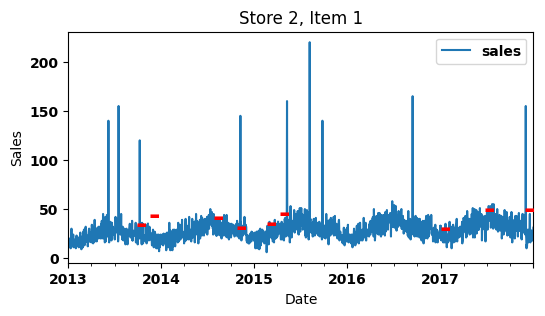

In [208]:
store_id = 2
item_id = 1
df_2plot = df_sales.query("(store==@store_id)&(item==@item_id)")

fig, ax = plt.subplots(figsize=(6, 3))
df_2plot[["date", "sales"]].plot(x="date", y="sales", ax=ax, legend=False)

# Replace NaN values with the mean of surrounding two points
nan_indices = df_2plot[df_2plot["sales"].isna()].index

if len(nan_indices) >= 1:
    df_2plot = df_2plot.assign(sales=lambda df: df["sales"].fillna(method="ffill"))
    # Draw arrows for NaN values
    nan_dates = df_2plot.loc[nan_indices, "date"]
    nan_sales = df_2plot.loc[nan_indices, "sales"]
    for date, sales in zip(nan_dates, nan_sales):
        ax.annotate(
            "-",
            xy=(date, sales),
            color="red",  # Set text color to red
            size=20,
        )

# Set plot labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.set_title(f"Store {store_id}, Item {item_id}")
ax.legend()
plt.show()

In [209]:
def fill_misisng_values(df):
    """Fill NaN values in the 'sales' column with the mean of non-NaN values"""
    df_filled = df.copy()
    df_filled["sales"] = df_filled["sales"].fillna(df_filled["sales"].mean())
    return df_filled

In [210]:
check_missing_values(fill_misisng_values(df_store2))

,counts,ratio (%)
date,0,0.0
store,0,0.0
item,0,0.0
sales,0,0.0


In [211]:
df_sales_filled = fill_misisng_values(df_sales)


In [212]:
check_missing_values(df_sales_filled)

,counts,ratio (%)
date,0,0.0
store,0,0.0
item,0,0.0
sales,0,0.0


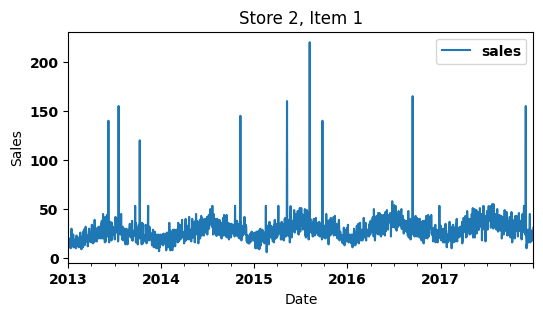

In [213]:
plot_sales(df_sales_filled, store_id=2, item_id=1)

### **Check and correct outliers**

In [214]:
(
    df_sales.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
    .iloc[1:,]
    .style.background_gradient(cmap ="coolwarm")
)

,date,store,item,sales
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,53.300697
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
1%,2013-01-19 00:00:00,1.000000,1.000000,10.000000
5%,2013-04-02 00:00:00,1.000000,3.000000,16.000000
10%,2013-07-02 00:00:00,1.900000,5.900000,20.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
90%,2017-07-02 00:00:00,9.100000,45.100000,94.000000
95%,2017-10-01 00:00:00,10.000000,48.000000,109.000000


<Axes: ylabel='Frequency'>

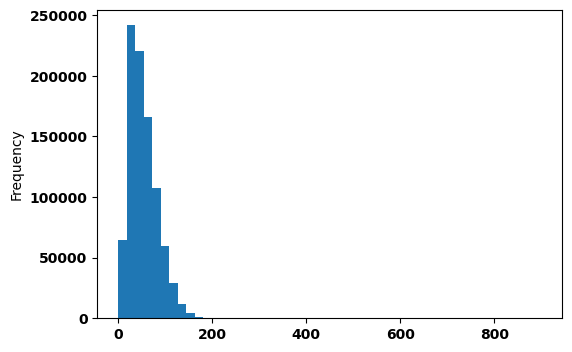

In [215]:
fig,ax = plt.subplots(figsize=(6,4))
df_sales["sales"].plot(kind="hist", bins = 50, ax = ax)

In [216]:
threshold_sales = 450
df_store2.query("sales >= @threshold_sales")

,date,store,item,sales
21412,2016-08-19,2,2,545.0
94348,2016-05-07,2,6,620.0
94792,2017-07-25,2,6,485.0
94825,2017-08-27,2,6,565.0
111902,2014-06-01,2,7,510.0
...,...,...,...,...
861778,2017-09-29,2,48,490.0
896737,2013-06-21,2,50,475.0
897921,2016-09-17,2,50,565.0
898167,2017-05-21,2,50,630.0


In [217]:
def correct_outliers(df, factor=3):
    """Identify and correct outliers in the 'sales' column by reducing them to the mean"""
    df_corrected = df.copy()

    # Identify outliers using z-score
    z_scores = (df_corrected["sales"] - df_corrected["sales"].mean()) / df_corrected[
        "sales"
    ].std()
    outlier_indices = np.abs(z_scores) > factor  # Adjust the threshold as needed
    # Correct outliers by reducing them to the mean
    df_corrected.loc[outlier_indices, "sales"] = df_corrected["sales"].mean()

    return df_corrected

In [218]:
# Correct outliers
df_sales_corrected = correct_outliers(df=df_sales_filled)

In [219]:
(
    df_sales_corrected.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.999])
    .iloc[1:,]
    .style.background_gradient(cmap="coolwarm")
)

,date,store,item,sales
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.082456
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
10%,2013-07-02 00:00:00,1.900000,5.900000,20.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,69.000000
90%,2017-07-02 00:00:00,9.100000,45.100000,92.000000
99%,2017-12-13 00:00:00,10.000000,50.000000,132.000000
99.9%,2017-12-30 00:00:00,10.000000,50.000000,150.000000
max,2017-12-31 00:00:00,10.000000,50.000000,154.000000


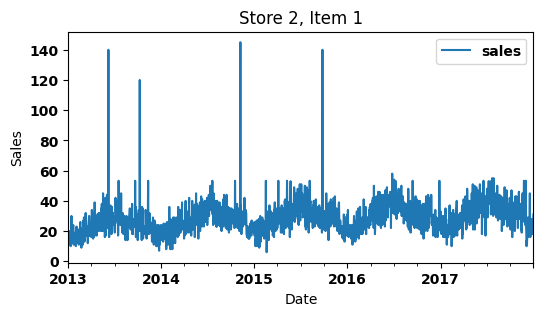

In [220]:
plot_sales(df_sales_corrected, store_id=2, item_id=1)

In [221]:
output_path = "/content/drive/MyDrive/quamet/Sales Forecasting/df_sales_corrected.csv"
df_sales_corrected.to_csv(output_path, index=False)

## **Part II : Features Engineering**


In [222]:
from pathlib import Path

import numpy as np
import pandas as pd
from tqdm import tqdm

pd.options.display.max_columns = 20
pd.options.display.max_rows = 150

In [223]:
df_sales = pd.read_csv("/content/drive/MyDrive/quamet/Sales Forecasting/df_sales_corrected.csv", parse_dates=["date"])

In [225]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 27.9 MB


In [226]:
df_sales.date.min(), df_sales.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

#### **Date time related features**

In [227]:
df = df_sales.copy()

In [228]:
def create_dt_features(df):
    """
    Enhances a DataFrame by extracting various date-related features from a 'date' column.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing a 'date' column.

    Returns:
    - pd.DataFrame: DataFrame with additional date-related features.
    """

    # Extracting month from the date
    df_new = df.assign(
        month=df.date.dt.month,
        # Extracting day of the week (0 = Monday, 6 = Sunday)
        day_of_week=df.date.dt.weekday,
        # Extracting day of the month
        day_of_month=df.date.dt.day,
        # Extracting day of the year
        day_of_year=df.date.dt.dayofyear,
        # Extracting ISO week of the year
        week_of_year=df.date.dt.isocalendar().week.astype(np.int64),
        # Checking if the day is a weekend (Saturday or Sunday) and converting to int
        is_weekend=(df.date.dt.weekday > 4).astype(np.int64),
        # Checking if the day is the start of the month and converting to int
        is_month_start=df.date.dt.is_month_start.astype(np.int64),
        # Checking if the day is the end of the month and converting to int
        is_month_end=df.date.dt.is_month_end.astype(np.int64),
        is_quarter_start=df.date.dt.is_quarter_start.astype(np.int64),
        is_quarter_end=df.date.dt.is_quarter_end.astype(np.int64),
        is_year_start=df.date.dt.is_year_start.astype(np.int64),
        is_year_end=df.date.dt.is_year_end.astype(np.int64),
    )

    return df_new

In [230]:
create_dt_features(df).sample(5)

,date,store,item,sales,month,day_of_week,day_of_month,day_of_year,week_of_year,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
202191,2016-08-24,1,12,63.0,8,2,24,237,34,0,0,0,0,0,0,0
704841,2013-01-06,7,39,32.0,1,6,6,6,1,1,0,0,0,0,0,0
314862,2015-03-02,3,18,79.0,3,0,2,61,10,0,0,0,0,0,0,0
702986,2017-12-08,5,39,27.0,12,4,8,342,49,0,0,0,0,0,0,0
614141,2014-08-29,7,34,20.0,8,4,29,241,35,0,0,0,0,0,0,0


#### **Sales related features**

In [231]:
# get the stores and items list
stores_lst = df["store"].unique().tolist()
items_lst = df["item"].unique().tolist()

##### **Last n days sales**

In [232]:
days = 1
keys = ["store", "item", "date"]
(
    df.sort_values(keys).assign(
        **{f"last_{days}_days_sales": lambda df: df["sales"].shift(days)}
    )
).iloc[:10]

,date,store,item,sales,last_1_days_sales
0,2013-01-01,1,1,13.0,NaN
1,2013-01-02,1,1,11.0,13.0
2,2013-01-03,1,1,14.0,11.0
3,2013-01-04,1,1,13.0,14.0
4,2013-01-05,1,1,10.0,13.0
5,2013-01-06,1,1,12.0,10.0
6,2013-01-07,1,1,10.0,12.0
7,2013-01-08,1,1,9.0,10.0
8,2013-01-09,1,1,12.0,9.0
9,2013-01-10,1,1,9.0,12.0


In [233]:

def add_last_ndays_sales(df, lst_days=[1, 7, 14, 21, 28, 90, 180]):
    # lst_days = [1, 7, 14, 21, 28, 90, 180]
    keys = ["store", "item", "date"]
    for days in lst_days:
        df = df.sort_values(keys).assign(
            **{f"last_{days}_days_sales": lambda df: df["sales"].shift(days)}
        )
    return df

In [234]:
add_last_ndays_sales(df).iloc[:50]

,date,store,item,sales,last_1_days_sales,last_7_days_sales,last_14_days_sales,last_21_days_sales,last_28_days_sales,last_90_days_sales,last_180_days_sales
0,2013-01-01,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,1,1,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-01-06,1,1,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-01-07,1,1,10.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2013-01-08,1,1,9.0,10.0,13.0,NaN,NaN,NaN,NaN,NaN
8,2013-01-09,1,1,12.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN
9,2013-01-10,1,1,9.0,12.0,14.0,NaN,NaN,NaN,NaN,NaN


##### **Recent mean, min, max, std sales in n days**

In [235]:
days = 7
keys = ["store", "item", "date"]
(
    df.sort_values(keys).assign(
        **{
            f"recent_{days}_mean_sales": lambda df: df["sales"].rolling(days).mean(),
            f"recent_{days}_min_sales": lambda df: df["sales"].rolling(days).min(),
            f"recent_{days}_max_sales": lambda df: df["sales"].rolling(days).max(),
            f"recent_{days}_std_sales": lambda df: df["sales"].rolling(days).std(),
        }
    )
).iloc[:10]

,date,store,item,sales,recent_7_mean_sales,recent_7_min_sales,recent_7_max_sales,recent_7_std_sales
0,2013-01-01,1,1,13.0,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11.0,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14.0,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13.0,NaN,NaN,NaN,NaN
4,2013-01-05,1,1,10.0,NaN,NaN,NaN,NaN
5,2013-01-06,1,1,12.0,NaN,NaN,NaN,NaN
6,2013-01-07,1,1,10.0,11.857143,10.0,14.0,1.573592
7,2013-01-08,1,1,9.0,11.285714,9.0,14.0,1.799471
8,2013-01-09,1,1,12.0,11.428571,9.0,14.0,1.812654
9,2013-01-10,1,1,9.0,10.714286,9.0,13.0,1.603567


In [236]:
def add_ndays_sales_stats(df, lst_days=[7, 14, 28, 60, 90]):
    keys = ["store", "item", "date"]
    for days in lst_days:
        df = df.sort_values(keys).assign(
            **{
                f"recent_{days}_days_mean_sales": lambda df: df["sales"]
                .rolling(days)
                .mean(),
                f"recent_{days}_days_min_sales": lambda df: df["sales"].rolling(days).min(),
                f"recent_{days}_day_max_sales": lambda df: df["sales"].rolling(days).max(),
                f"recent_{days}_day_std_sales": lambda df: df["sales"].rolling(days).std(),
            }
        )
    return df

In [237]:
add_ndays_sales_stats(df).iloc[:50]

,date,store,item,sales,recent_7_days_mean_sales,recent_7_days_min_sales,recent_7_day_max_sales,recent_7_day_std_sales,recent_14_days_mean_sales,recent_14_days_min_sales,...,recent_28_day_max_sales,recent_28_day_std_sales,recent_60_days_mean_sales,recent_60_days_min_sales,recent_60_day_max_sales,recent_60_day_std_sales,recent_90_days_mean_sales,recent_90_days_min_sales,recent_90_day_max_sales,recent_90_day_std_sales
0,2013-01-01,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,1,1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-01-06,1,1,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-01-07,1,1,10.0,11.857143,10.0,14.0,1.573592,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013-01-08,1,1,9.0,11.285714,9.0,14.0,1.799471,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013-01-09,1,1,12.0,11.428571,9.0,14.0,1.812654,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2013-01-10,1,1,9.0,10.714286,9.0,13.0,1.603567,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **Exponentially weighted moving average sales**

In [238]:
days = 3
alpha = 0.5
keys = ["store", "item", "date"]
(
    df.sort_values(keys).assign(
        **{
            f"sales_ewma_{days}_sales": lambda df: df["sales"]
            .shift(days)
            .ewm(alpha=alpha)
            .mean()
        }
    )
).iloc[:10]

,date,store,item,sales,sales_ewma_3_sales
0,2013-01-01,1,1,13.0,NaN
1,2013-01-02,1,1,11.0,NaN
2,2013-01-03,1,1,14.0,NaN
3,2013-01-04,1,1,13.0,13.000000
4,2013-01-05,1,1,10.0,11.666667
5,2013-01-06,1,1,12.0,13.000000
6,2013-01-07,1,1,10.0,13.000000
7,2013-01-08,1,1,9.0,11.451613
8,2013-01-09,1,1,12.0,11.730159
9,2013-01-10,1,1,9.0,10.858268


In [239]:
def add_ewma_sales(df, lst_days=[3, 7, 14, 28, 60, 90], alphas=[0.5, 0.75, 0.9]):
    keys = ["store", "item", "date"]

    for alpha in alphas:
        for days in lst_days:
            df = df.sort_values(keys).assign(
                **{
                    f"sales_ewma_{alpha}_alpha_{days}_days_sales": lambda df: df[
                        "sales"
                    ]
                    .shift(days)
                    .ewm(alpha=alpha)
                    .mean()
                }
            )
    return df

In [240]:
add_ewma_sales(df).iloc[:10]

,date,store,item,sales,sales_ewma_0.5_alpha_3_days_sales,sales_ewma_0.5_alpha_7_days_sales,sales_ewma_0.5_alpha_14_days_sales,sales_ewma_0.5_alpha_28_days_sales,sales_ewma_0.5_alpha_60_days_sales,sales_ewma_0.5_alpha_90_days_sales,...,sales_ewma_0.75_alpha_14_days_sales,sales_ewma_0.75_alpha_28_days_sales,sales_ewma_0.75_alpha_60_days_sales,sales_ewma_0.75_alpha_90_days_sales,sales_ewma_0.9_alpha_3_days_sales,sales_ewma_0.9_alpha_7_days_sales,sales_ewma_0.9_alpha_14_days_sales,sales_ewma_0.9_alpha_28_days_sales,sales_ewma_0.9_alpha_60_days_sales,sales_ewma_0.9_alpha_90_days_sales
0,2013-01-01,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13.0,13.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,1,1,10.0,11.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.181818,NaN,NaN,NaN,NaN,NaN
5,2013-01-06,1,1,12.0,13.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.720721,NaN,NaN,NaN,NaN,NaN
6,2013-01-07,1,1,10.0,13.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.072007,NaN,NaN,NaN,NaN,NaN
7,2013-01-08,1,1,9.0,11.451613,13.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.307173,13.000000,NaN,NaN,NaN,NaN
8,2013-01-09,1,1,12.0,11.730159,11.666667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.830719,11.181818,NaN,NaN,NaN,NaN
9,2013-01-10,1,1,9.0,10.858268,13.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.183072,13.720721,NaN,NaN,NaN,NaN


#### **Stores and items related features**

##### **Stores and items sales**

In [241]:
date_start = pd.Timestamp("2016-01-01")

days = 7
date_end = date_start + pd.Timedelta(days, unit="D")
# print(end)

gb_keys = ["store"]

condition = "(date >= @date_start) & (date < @date_end)"
_df = df.query(condition)
_df_sum = _df.groupby(gb_keys).sales.sum()
_df_mean = _df.groupby(gb_keys).sales.mean()

df_result = pd.DataFrame(
    {
        "date": date_end,
        f"sum_store_sales_in_{days}days": _df_sum,
        f"mean_store_sales_in_{days}days": _df_mean,
    }
)

In [242]:
df_result

,date,sum_store_sales_in_7days,mean_store_sales_in_7days
store,,,
1,2016-01-08,12304.804184,35.156583
2,2016-01-08,17263.601395,49.324575
3,2016-01-08,15254.300697,43.583716
4,2016-01-08,14433.902092,41.239720
5,2016-01-08,10208.601395,29.167433
6,2016-01-08,10302.300697,29.435145
7,2016-01-08,9554.902092,27.299720
8,2016-01-08,16550.202789,47.286294
9,2016-01-08,13970.202789,39.914865


In [243]:
def add_summary_sales_features(df, date_range, gb_keys=["store"], days=7):
    start_flg = True
    for date_start in date_range:
        date_end = date_start + pd.Timedelta(days, unit="D")
        time_range_condition = "(date >= @date_start) & (date < @date_end)"
        _df = df.query(time_range_condition)
        _df_sum = _df.groupby(gb_keys).sales.sum()
        _df_mean = _df.groupby(gb_keys).sales.mean()
        if start_flg:
            df_result = pd.DataFrame(
                {
                    "date": date_end,
                    f"sum_{days}_days_{gb_keys[0]}_sales": _df_sum,
                    f"mean_{days}_days_{gb_keys[0]}_sales": _df_mean,
                }
            )
            start_flg = False
        else:
            df_new_row = pd.DataFrame(
                {
                    "date": date_end,
                    f"sum_{days}_days_{gb_keys[0]}_sales": _df_sum,
                    f"mean_{days}_days_{gb_keys[0]}_sales": _df_mean,
                }
            )
            df_result = pd.concat([df_result, df_new_row])
    # limit the range of result dataframe
    upper_limit = df.date.max()
    df_result = df_result.query("date <= @upper_limit")
    return df_result

In [244]:
date_range = pd.date_range("2016-01-01", "2016-01-01")
days = 7
display(
    add_summary_sales_features(df, date_range=date_range, gb_keys=["item"], days=days)
)

,date,sum_7_days_item_sales,mean_7_days_item_sales
item,,,
1,2016-01-08,1172.000000,16.742857
2,2016-01-08,2983.000000,42.614286
3,2016-01-08,1986.601395,28.380020
4,2016-01-08,1117.000000,15.957143
5,2016-01-08,933.300697,13.332867
6,2016-01-08,3006.000000,42.942857
7,2016-01-08,2954.300697,42.204296
8,2016-01-08,3987.300697,56.961439
9,2016-01-08,2541.000000,36.300000


##### **Stores and items encoding**

In [245]:
def add_ohe_features(df, columns_to_encode):
    df_encoded = df.copy()
    df_encoded = pd.get_dummies(df_encoded, columns=columns_to_encode)
    return df_encoded

In [246]:
add_ohe_features(df, ["store", "item"])

,date,sales,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,...,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
0,2013-01-01,13.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2013-01-02,11.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2013-01-03,14.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2013-01-04,13.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2013-01-05,10.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,63.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
912996,2017-12-28,59.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
912997,2017-12-29,74.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
912998,2017-12-30,62.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


#### **Weather temperature**

In [247]:
df_tokyo_weather = pd.read_csv("/content/drive/MyDrive/quamet/Sales Forecasting/tokyo_weather.csv", parse_dates=["date"])

In [248]:
df_tokyo_weather.sample(5)

,date,temperature,humidity,season,year
201,2016-07-20,23.647145,65.813914,summer,2016
133,2016-05-13,10.405026,58.006290,spring,2016
472,2017-04-17,11.300064,60.326127,spring,2017
669,2017-10-31,7.675445,58.814746,fall,2017
598,2017-08-21,23.621985,76.709661,summer,2017


In [249]:
df_tokyo_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         731 non-null    datetime64[ns]
 1   temperature  731 non-null    float64       
 2   humidity     731 non-null    float64       
 3   season       731 non-null    object        
 4   year         731 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 28.7+ KB


In [250]:
df_tokyo_weather.groupby(["year", "season"]).mean()

date  temperature   humidity
year season                                                      
2016 fall   2016-10-16 00:00:00.000000000    16.324803  59.234469
     spring 2016-04-15 12:00:00.000000000    15.344293  50.313667
     summer 2016-07-16 12:00:00.000000000    24.714545  79.511701
     winter 2016-05-18 16:21:05.934065920     5.407702  29.266415
2017 fall   2017-10-16 00:00:00.000000000    15.286498  62.447524
     spring 2017-04-15 12:00:00.000000000    15.911319  49.956591
     summer 2017-07-16 12:00:00.000000000    24.235123  80.011156
     winter 2017-05-20 05:20:00.000000000     5.132455  31.410075

#### **Create features**

##### **Add last n days sales**

In [251]:
# Add the sales related features
grouped = df.groupby(["store", "item"])
df_lst = []
for store in stores_lst:
    for item in items_lst:
        df_store = grouped.get_group((store, item))
        df_features = add_last_ndays_sales(df_store)
        df_features = add_ndays_sales_stats(df_features)
        # df_features = add_ewma_sales(df_features)
        df_lst.append(df_features)

df_recent_sales = pd.concat(df_lst, axis=0, ignore_index=True)

In [252]:
df_recent_sales

,date,store,item,sales,last_1_days_sales,last_7_days_sales,last_14_days_sales,last_21_days_sales,last_28_days_sales,last_90_days_sales,...,recent_28_day_max_sales,recent_28_day_std_sales,recent_60_days_mean_sales,recent_60_days_min_sales,recent_60_day_max_sales,recent_60_day_std_sales,recent_90_days_mean_sales,recent_90_days_min_sales,recent_90_day_max_sales,recent_90_day_std_sales
0,2013-01-01,1,1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11.0,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14.0,11.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13.0,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,1,1,10.0,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63.0,41.0,51.0,67.0,60.000000,76.0,82.0,...,86.0,10.468095,75.105012,41.0,123.0,16.919650,77.425563,41.0,123.0,16.164658
912996,2017-12-28,10,50,59.0,63.0,63.0,72.0,66.000000,73.0,90.0,...,86.0,10.311784,74.605012,41.0,123.0,16.945325,77.081119,41.0,123.0,16.223878
912997,2017-12-29,10,50,74.0,59.0,75.0,72.0,67.000000,66.0,103.0,...,86.0,10.517739,74.688345,41.0,123.0,16.929581,76.758897,41.0,123.0,15.989612
912998,2017-12-30,10,50,62.0,74.0,70.0,52.0,53.300697,49.0,99.0,...,86.0,10.162179,74.388345,41.0,123.0,16.993225,76.347786,41.0,123.0,15.886668


In [253]:
def add_sales_features(df):
    """Add the sales related features"""
    grouped = df.groupby(["store", "item"])
    df_lst = []
    for store in stores_lst:
        for item in items_lst:
            df_store = grouped.get_group((store, item))
            df_features = add_last_ndays_sales(df_store)
            df_features = add_ndays_sales_stats(df_features)
            df_features = add_ewma_sales(df_features)
            df_lst.append(df_features)

    df_recent_sales = pd.concat(df_lst, axis=0, ignore_index=True)
    return df_recent_sales

##### **Add stores and items features**

In [254]:
# Add the stores and items sales
date_range = pd.date_range(df.date.min(), df.date.max(), freq="D")
days_lst = [7, 14, 30]
for days in days_lst:
    df_sales_by_store = add_summary_sales_features(
        df, date_range=date_range, gb_keys=["store"], days=days
    )
    df_sales_by_item = add_summary_sales_features(
        df, date_range=date_range, gb_keys=["item"], days=days
    )
    globals()[f"df_{days}_sales_by_store"] = df_sales_by_store.reset_index()
    globals()[f"df_{days}_sales_by_item"] = df_sales_by_item.reset_index()

In [255]:
df_30_sales_by_item

,item,date,sum_30_days_item_sales,mean_30_days_item_sales
0,1,2013-01-31,3793.000000,12.643333
1,2,2013-01-31,10220.202789,34.067343
2,3,2013-01-31,6254.000000,20.846667
3,4,2013-01-31,3672.300697,12.241002
4,5,2013-01-31,3340.503487,11.135012
...,...,...,...,...
89795,46,2017-12-31,15171.601395,50.572005
89796,47,2017-12-31,5968.202789,19.894009
89797,48,2017-12-31,13273.601395,44.245338
89798,49,2017-12-31,7329.000000,24.430000


In [256]:
# Add the stores and items sales
date_range = pd.date_range(df.date.min(), df.date.max(), freq="D")
days_lst = [7, 14, 30]
df_joined = pd.DataFrame()

# Create an empty list to store DataFrames
df_joined = pd.DataFrame()

# Flag to track the first iteration
start_flg = True

# Iterate through days_lst with tqdm for progress tracking
for days in days_lst:
# for days in tqdm(days_lst, desc="Processing days_lst"):
    # Calculate sales features for stores and items
    df_sales_by_store = add_summary_sales_features(
        df, date_range=date_range, gb_keys=["store"], days=days
    )
    df_sales_by_item = add_summary_sales_features(
        df, date_range=date_range, gb_keys=["item"], days=days
    )

    # Reset index before concatenating
    df_sales_by_store = df_sales_by_store.reset_index()
    df_sales_by_item = df_sales_by_item.reset_index()

    df2join = pd.merge(df_sales_by_store, df_sales_by_item, on=["date"], how="left")
    if start_flg:
        df_joined = df.merge(df2join, on=["store", "item", "date"], how="left")
        start_flg = False
    else:
        df_joined = df_joined.merge(df2join, on=["store", "item", "date"], how="left")

In [257]:
condition = "(store==2)&(item==2)&(date=='2016-01-31')"
df_joined.query(condition)

<ipython-input-257-b69b71dd1352>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_joined.query(condition)


,date,store,item,sales,sum_7_days_store_sales,mean_7_days_store_sales,sum_7_days_item_sales,mean_7_days_item_sales,sum_14_days_store_sales,mean_14_days_store_sales,sum_14_days_item_sales,mean_14_days_item_sales,sum_30_days_store_sales,mean_30_days_store_sales,sum_30_days_item_sales,mean_30_days_item_sales
21211,2016-01-31,2,2,76.0,17279.202789,49.369151,2952.300697,42.175724,34557.503487,49.367862,6010.300697,42.930719,74623.307671,49.748872,13081.601395,43.605338


In [258]:
def merge_sales_features(df, days_lst):
    """
    Merge sales features for stores and items based on the specified days.

    Parameters:
    - df (pd.DataFrame): Original DataFrame.
    - days_lst (list): List of days for which sales features need to be calculated.

    Returns:
    - pd.DataFrame: Merged DataFrame containing sales features for stores and items.
    """
    # Add the stores and items sales
    date_range = pd.date_range(df.date.min(), df.date.max(), freq="D")

    # Create an empty DataFrame to store the merged results
    df_joined = pd.DataFrame()

    # Flag to track the first iteration
    start_flg = True

    # Iterate through days_lst with tqdm for progress tracking
    for days in days_lst:
        # Calculate sales features for stores and items
        df_sales_by_store = add_summary_sales_features(
            df, date_range=date_range, gb_keys=["store"], days=days
        )
        df_sales_by_item = add_summary_sales_features(
            df, date_range=date_range, gb_keys=["item"], days=days
        )

        # Reset index before concatenating
        df_sales_by_store = df_sales_by_store.reset_index()
        df_sales_by_item = df_sales_by_item.reset_index()

        # Merge sales features for stores and items based on the date
        df2join = pd.merge(df_sales_by_store, df_sales_by_item, on=["date"], how="left")

        if start_flg:
            # For the first iteration, merge with the original DataFrame
            df_joined = df.merge(df2join, on=["store", "item", "date"], how="left")
            start_flg = False
        else:
            # For subsequent iterations, merge with the previously merged DataFrame
            df_joined = df_joined.merge(
                df2join, on=["store", "item", "date"], how="left"
            )

    return df_joined

In [259]:
# Add stores and items related features
df_preprocessed = merge_sales_features(df_recent_sales, days_lst=[7, 14, 30])

In [260]:
# Add One Hot Encoding for stores and items
df_preprocessed = add_ohe_features(df_preprocessed, columns_to_encode=["store", "item"])

##### **Add weather features**

In [261]:
df_tokyo_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         731 non-null    datetime64[ns]
 1   temperature  731 non-null    float64       
 2   humidity     731 non-null    float64       
 3   season       731 non-null    object        
 4   year         731 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 28.7+ KB


In [262]:
# Add weather data
df_preprocessed.merge(
    df_tokyo_weather[["date", "temperature", "humidity"]],
    on=["date"],
    how="left",
).head()

,date,sales,last_1_days_sales,last_7_days_sales,last_14_days_sales,last_21_days_sales,last_28_days_sales,last_90_days_sales,last_180_days_sales,recent_7_days_mean_sales,...,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,temperature,humidity
0,2013-01-01,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,NaN
1,2013-01-02,11.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,NaN
2,2013-01-03,14.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,NaN
3,2013-01-04,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,NaN
4,2013-01-05,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,NaN


In [263]:
def add_weather_features(df, df_weather):
    """Add weather data"""
    return df.merge(
        df_weather[["date", "temperature", "humidity"]],
        on=["date"],
        how="left",
    )

In [264]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Columns: 101 entries, date to item_50
dtypes: bool(60), datetime64[ns](1), float64(40)
memory usage: 337.8 MB


##### **Main processing (main function)**

In [265]:
def create_features(df, df_weather):
    """
    Enhance a DataFrame with additional features for analytical modeling.

    Parameters:
    - df (pd.DataFrame): The original DataFrame containing the base data.
    - df_weather (pd.DataFrame): DataFrame containing weather information to be merged.

    Returns:
    - pd.DataFrame: The DataFrame with added features for analysis and modeling.

    Steps:
    1. Add sales-related features to the DataFrame using the 'add_sales_features' function.
    2. Merge additional sales-related features based on different time windows (7, 14, and 30 days).
    3. Apply One Hot Encoding to categorical columns ('store' and 'item') using 'add_ohe_features'.
    4. Add weather-related features to the DataFrame based on the provided 'df_weather'.

    Example:
    ```python
    # Assuming df and df_weather are the DataFrames to be used
    enhanced_df = create_features(df, df_weather)
    ```

    Note:
    - Ensure that the required functions ('add_sales_features', 'merge_sales_features', 'add_ohe_features',
      and 'add_weather_features') are defined and available in the environment.

    """
    # Add sales features
    df = add_sales_features(df)

    # Add stores and items related features
    df = merge_sales_features(df, days_lst=[7, 14, 30])

    # Add One Hot Encoding for stores and items
    # df = add_ohe_features(df, columns_to_encode=["store", "item"])

    # Add weather information
    df = add_weather_features(df, df_weather)

    return df

In [266]:
df_preprocessed = create_features(df, df_tokyo_weather)

In [267]:
df_preprocessed.shape[1]

63

In [268]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   date                                 913000 non-null  datetime64[ns]
 1   store                                913000 non-null  int64         
 2   item                                 913000 non-null  int64         
 3   sales                                913000 non-null  float64       
 4   last_1_days_sales                    912500 non-null  float64       
 5   last_7_days_sales                    909500 non-null  float64       
 6   last_14_days_sales                   906000 non-null  float64       
 7   last_21_days_sales                   902500 non-null  float64       
 8   last_28_days_sales                   899000 non-null  float64       
 9   last_90_days_sales                   868000 non-null  float64       
 

#### **Save data with additional features**

In [269]:
def save_data(df, file_path, file_format="feather"):
    """
    Save a DataFrame to a specified file format.

    Parameters:
    - df (pd.DataFrame): The DataFrame to be saved.
    - file_path (str): The path where the file will be saved.
    - file_format (str): The format in which to save the file. Supported formats: 'feather', 'csv'.
                        Default is 'feather'.
    Example:
    ```python
    # Assuming df is the DataFrame you want to save
    save_data(df, 'output_data.feather', file_format='feather')
    ```

    Note:
    - Make sure to have the required libraries (pandas and feather-format) installed.
    """
    if file_format.lower() == "feather":
        # Save to Feather format
        df.to_feather(file_path)
        print(f"DataFrame saved to {file_path} in Feather format.")
    elif file_format.lower() == "csv":
        # Save to CSV format
        df.to_csv(file_path, index=False)
        print(f"DataFrame saved to {file_path} in CSV format.")
    else:
        print(f"Error: Unsupported file format '{file_format}'. Supported formats: 'feather', 'csv'.")

In [270]:
num_features = df_preprocessed.shape[1]
save_path = Path(f"/content/drive/MyDrive/quamet/Sales Forecasting/data_additional_{num_features}_features.feather")

In [271]:
save_data(df_preprocessed, save_path, file_format='feather')

DataFrame saved to /content/drive/MyDrive/quamet/Sales Forecasting/data_additional_63_features.feather in Feather format.
